In [2]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl,plt

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [12]:
def gen_paths(S0,r,sigma,T,M,I):
    dt=T/M
    paths=np.zeros((M+1,I))
    paths[0]=s0
    for t in range(1,M+1):
        rand=np.random.standard_normal(I)
        rand=(rand-rand.mean())/rand.std()
        paths[t]=paths[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*rand)
    return paths

In [10]:
s0=100
r=0.05
sigma=0.2
T=1
M=50
I=250000
np.random.seed(1000)

In [13]:
paths=gen_paths(s0,r,sigma,T,M,I)

In [14]:
paths[-1].mean()

105.12645392478755

In [15]:
s0*np.exp(r*T)

105.12710963760242

Text(0, 0.5, 'index level')

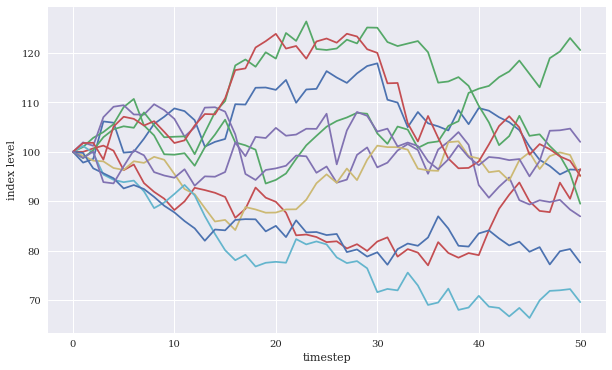

In [17]:
plt.figure(figsize=(10,6))
plt.plot(paths[:,:10])
plt.xlabel('timestep')
plt.ylabel('index level')

In [22]:
paths.shape

(51, 250000)

In [29]:
log_returns=np.log(paths[1:]/paths[:-1])

In [32]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [40]:
def print_stat(array):
    sta=scs.describe(array)
    print('%14s %15s'%('statistics','value'))
    print(30*'-')
    print('%14s %15.5f'%('size',round(sta[0])))
    print('%14s %15.5f'%('min',sta[1][0]))
    print('%14s %15.5f'%('max',sta[1][1]))
    print('%14s %15.5f'%('mean',sta[2]))
    print('%14s %15.5f'%('std',np.sqrt(sta[3])))
    print('%14s %15.5f'%('skew',sta[4]))
    print('%14s %15.5f'%('kurtosis',sta[5]))

In [41]:
print_stat(log_returns.flatten())

    statistics           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


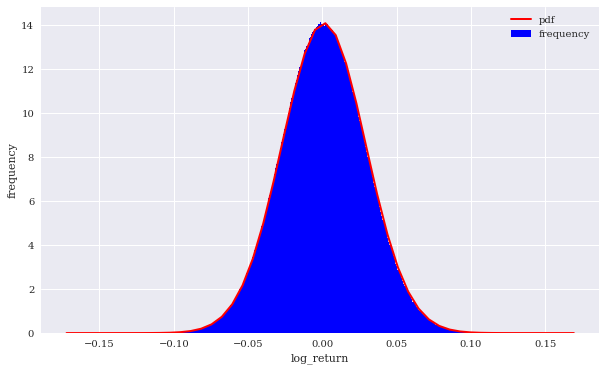

In [47]:
plt.figure(figsize=(10,6))
plt.hist(log_returns.flatten(),bins=400,density=True,label='frequency',color='b')
plt.xlabel('log_return')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,r/M,sigma/np.sqrt(M)),label='pdf',color='r',lw=2.0)
plt.legend()

Text(0, 0.5, 'sample quantiles')

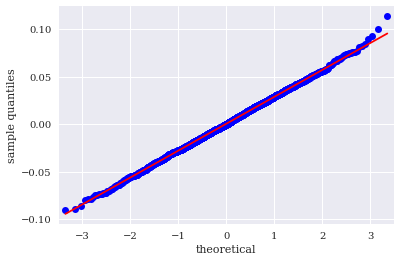

In [54]:
sm.qqplot(log_returns.flatten()[::5000],line='s')
plt.xlabel('theoretical')
plt.ylabel('sample quantiles')


In [57]:
def normal_test(arr):
    print('Skew of dataset    %14.3f' % scs.skew(arr))
    print('Skew test Pvalue   %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of dataset    %14.3f' % scs.kurtosis(arr))
    print('Kurt test Pvalue   %14.3f' % scs.kurtosistest(arr)[1])
    print('Normal test Pvalue %14.3f' % scs.normaltest(arr)[1])
    
    
    

In [58]:
normal_test(log_returns.flatten())

Skew of dataset             0.001
Skew test Pvalue            0.430
Kurt of dataset             0.001
Kurt test Pvalue            0.541
Normal test Pvalue          0.607


Text(0, 0.5, 'log data')

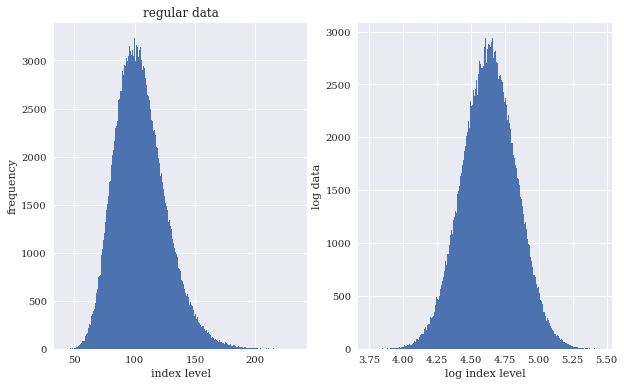

In [61]:
f, (ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1.hist(paths[-1],bins=300)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]),bins=300)
ax2.set_xlabel('log index level')
ax2.set_ylabel('log data')

In [62]:
print_stat(paths[-1])

    statistics           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [63]:
print_stat(np.log(paths[-1]))

    statistics           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [64]:
normal_test(np.log(paths[-1]))

Skew of dataset            -0.001
Skew test Pvalue            0.851
Kurt of dataset            -0.003
Kurt test Pvalue            0.744
Normal test Pvalue          0.931


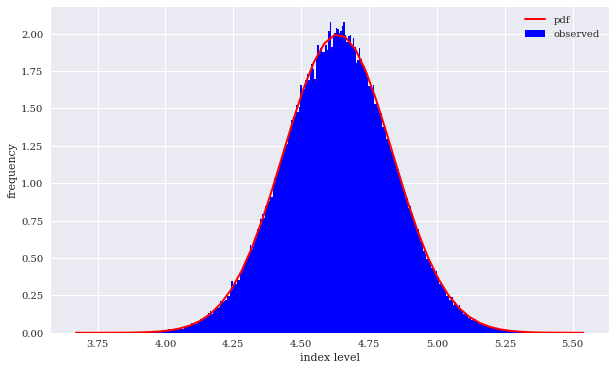

In [65]:
plt.figure(figsize=(10,6))
log_data=np.log(paths[-1])
plt.hist(log_data,bins=300,density=True,label='observed',color='b')
plt.xlabel('index level')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,log_data.mean(),log_data.std()),
        'r',lw=2.0,label='pdf')
plt.legend()
plt.show()

Text(0, 0.5, 'sample quant')

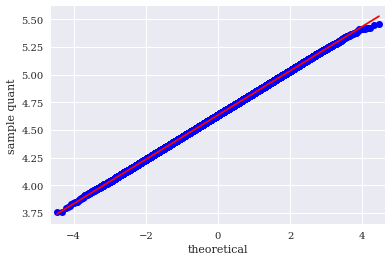

In [66]:
sm.qqplot(log_data,line='s')
plt.xlabel('theoretical')
plt.ylabel('sample quant')

In [67]:
import pandas as pd

In [69]:
raw=pd.read_csv('tr_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [70]:
symbol=['SPY','GLD','AAPL.O','MSFT.O']

In [71]:
data=raw[symbol]
data=data.dropna()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
SPY       2138 non-null float64
GLD       2138 non-null float64
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
dtypes: float64(4)
memory usage: 83.5 KB


In [73]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


In [74]:
log_returns=np.log(data/data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ACD4FDD7B8>,
      dtype=object)

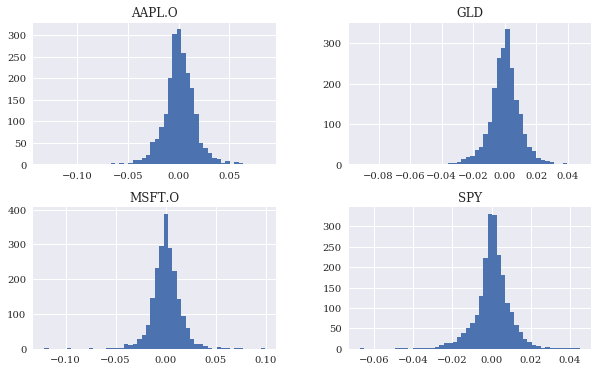

In [75]:
log_returns.hist(bins=50,figsize=(10,6))

In [77]:
for s in symbol:
    print('\nResults for symbol {}'.format(s))
    print(30*'-')
    log_=np.array(log_returns[s].dropna())
    print_stat(log_)


Results for symbol SPY
------------------------------
    statistics           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
------------------------------
    statistics           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
------------------------------
    statistics           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.00084
           std         0.01591
          skew        -0.23510
      kurtosis         4.7